<a href="https://colab.research.google.com/github/jjpal/dk122022_data_dive/blob/main/SNAP__SVI__Map_Meal_gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Identifying potential eligibility-enrollment gap localities

   ### Compare SNAP benefit uptake and measures of social vulnerability 

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### SUPPLEMENTAL NUTRITION ASSISTANCE PROGRAM (SNAP)

Column Headers

Substate, PersonsPublic, PersonsNonPublic, PersonsTotal,HouseholdsPublicAssistance, HouseholdsNonPublicAssistance, HouseholdsTotal,Issuance, month, year, countyFIPS, countyNAME, stateFIPS, stateNAME

In [ ]:
# Processed Merged SNAP data
snap_files_merge_url = 'https://raw.githubusercontent.com/michaelbbryan/tools-and-kaggles/main/DataDive2022/snapmergecounty.csv'


In [ ]:
# Load SNAP dataset
snap_files_merge_df = pd.read_csv(snap_files_merge_url)

In [ ]:
# shape of SNAP dataframe
snap_files_merge_df.shape

(183005, 14)

In [ ]:
# Only select year 2020 to match up with the other datasets
snap_county_2020_df = snap_files_merge_df[snap_files_merge_df['year'] == 2020]

In [ ]:
# groupby on multiple columns and calculate a sum over each combination group.
snap_county_2020_df_new = snap_county_2020_df.groupby(['countyFIPS','year']).sum().reset_index()

In [ ]:
# display sample of dataset
snap_county_2020_df_new.sample(3)

,countyFIPS,year,PersonsPublic,PersonsNonPublic,PersonsTotal,HouseholdsPublicAssistance,HouseholdsNonPublicAssistance,HouseholdsTotal,Issuance,stateFIPS
421,13143,2020,1364.0,9387.0,10751.0,845.0,4410.0,5255.0,1292227.0,26
57,1115,2020,2654.0,18020.0,20674.0,1534.0,7781.0,9315.0,3053396.0,2
482,13267,2020,1084.0,7286.0,8370.0,629.0,3199.0,3828.0,975625.0,26


In [ ]:
# shape after filtered rows for year 2020
snap_county_2020_df_new.shape

(2536, 10)

### Social Vulnerability Indicators (selected columns)


#### SVI RPL THEMES

RPL_THEME1 - Percentile ranking for Socioeconomic Status theme

RPL_THEME2 - Percentile ranking for Household Characteristics theme 

RPL_THEME3 - Percentile ranking for Racial and Ethnic Minority Status theme

RPL_THEME4 - Percentile ranking for Housing Type/ Transportation theme

RPL_THEMES - Overall percentile ranking

In [ ]:
# social vulnerability indicators for 2020
svi2020_url = 'https://raw.githubusercontent.com/jjpal/dk122022_data_dive/main/SVI2020_US_COUNTY.csv'

# load svi dataset with selected columns
svi_2020_df = pd.read_csv(svi2020_url, usecols = ['STATE','ST_ABBR','COUNTY','FIPS','RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4', 'RPL_THEMES'])

# display sample of dataset
svi_2020_df.sample(3)

,STATE,ST_ABBR,COUNTY,FIPS,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4,RPL_THEMES
2658,Texas,TX,King,48269,0.9357,0.2715,0.5710,0.0016,0.3135
2571,Texas,TX,Concho,48095,0.2960,0.6544,0.8329,0.4621,0.4965
276,Colorado,CO,Kiowa,8061,0.0621,0.2925,0.1445,0.1139,0.0694


In [ ]:
# shape before merging dataframes
svi_2020_df.shape

(3143, 9)

In [ ]:
# merge previously merged SNAP data with svi2020 indicators
SNAP_SVI = pd.merge(snap_county_2020_df_new, svi_2020_df,left_on='countyFIPS',right_on='FIPS',how='inner')

In [ ]:
# shape after merging dataframes
SNAP_SVI.shape 

(2507, 19)

In [ ]:
#SNAP_SVI.columns
SNAP_SVI.head(2)

,countyFIPS,year,PersonsPublic,PersonsNonPublic,PersonsTotal,HouseholdsPublicAssistance,HouseholdsNonPublicAssistance,HouseholdsTotal,Issuance,stateFIPS,STATE,ST_ABBR,COUNTY,FIPS,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4,RPL_THEMES
0,1001,2020,1977.0,13108.0,15085.0,1064.0,5764.0,6828.0,2219777.0,2,Alabama,AL,Autauga,1001,0.4045,0.7362,0.6337,0.4309,0.5325
1,1003,2020,3723.0,37358.0,41081.0,2229.0,16252.0,18481.0,6120282.0,2,Alabama,AL,Baldwin,1003,0.4112,0.2724,0.5022,0.3612,0.3552


### Map Meal Gap Data 

In [ ]:
# map_meal_gap_data - with County sheet name
map_meal_gap_2020_df = pd.read_excel(io='https://github.com/jjpal/dk122022_data_dive/blob/main/MMG2022_2020-2019Data_ToShare.xlsx?raw=true', sheet_name ='County')

In [ ]:
# filter to only capture the rows for year 2020
map_meal_gap_2020_df = map_meal_gap_2020_df[map_meal_gap_2020_df['Year'] == 2020]

In [ ]:
# display first row of dataframe
map_meal_gap_2020_df.head(1)

,FIPS,State,"County, State",Year,Overall Food Insecurity Rate (1 Year),# of Food Insecure Persons Overall (1 Year),Food Insecurity Rate among Black Persons (all ethnicities),Food Insecurity Rate among Hispanic Persons (any race),"Food Insecurity Rate among White, non-Hispanic Persons",Low Threshold in state,...,% FI ≤ Low Threshold,% FI Btwn Thresholds,% FI > High Threshold,Child Food Insecurity Rate (1 Year),# of Food Insecure Children (1 Year),% food insecure children in HH w/ HH incomes below 185 FPL,% food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal (1 Year),Weighted weekly $ needed by FI,Weighted Annual Food Budget Shortfall
0,1001.0,AL,"Autauga County, Alabama",2020.0,0.145,8070.0,0.25,NaN,0.09,1.3,...,0.476,0.147,0.377,0.181,2380.0,0.71,0.29,3.22,17.092792,4184000.0


In [ ]:
# rename State column which is the State abbreviation
map_meal_gap_2020_df.rename(columns = {"State":'State_Abbrev'}, inplace = True)

In [ ]:
# separate County and State into different columns
map_meal_gap_2020_df[['County', 'States']] = map_meal_gap_2020_df['County, State'].str.split(pat = ',', expand = True)

In [ ]:
# drop extra column 
map_meal_gap_2020_df.drop('County, State', axis=1, inplace=True)

# Rename column
map_meal_gap_2020_df.rename(columns = {"States":'State'}, inplace = True)

In [ ]:
# shape after filtered 2020 rows and column drop above
map_meal_gap_2020_df.shape

(3143, 24)

In [ ]:
# change the datatype to datetime
map_meal_gap_2020_df['Year'] = pd.to_datetime(map_meal_gap_2020_df['Year'], format='%Y')                            

In [ ]:
# change the datatype
map_meal_gap_2020_df['FIPS'] = map_meal_gap_2020_df['FIPS'].astype(int)

In [ ]:
# combine previously merged snap_svi df with map meal datase
map_svi_snap = pd.merge(SNAP_SVI, map_meal_gap_2020_df,left_on='FIPS',right_on='FIPS',how='inner')

In [ ]:
# merged dataframe shape and columns 
print(map_svi_snap.shape)
print(map_svi_snap.columns)

(2507, 42)
Index(['countyFIPS', 'year', 'PersonsPublic', 'PersonsNonPublic',
       'PersonsTotal', 'HouseholdsPublicAssistance',
       'HouseholdsNonPublicAssistance', 'HouseholdsTotal', 'Issuance',
       'stateFIPS', 'STATE', 'ST_ABBR', 'COUNTY', 'FIPS', 'RPL_THEME1',
       'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4', 'RPL_THEMES', 'State_Abbrev',
       'Year', 'Overall Food Insecurity Rate (1 Year)',
       '# of Food Insecure Persons Overall (1 Year)',
       'Food Insecurity Rate among Black Persons (all ethnicities)',
       'Food Insecurity Rate among Hispanic Persons (any race)',
       'Food Insecurity Rate among White, non-Hispanic Persons ',
       'Low Threshold in state', 'Low Threshold Type',
       'High Threshold in state', 'High Threshold Type',
       '% FI ≤ Low Threshold', '% FI Btwn Thresholds', '% FI > High Threshold',
       'Child Food Insecurity Rate (1 Year)',
       '# of Food Insecure Children (1 Year)',
       '% food insecure children in HH w/ HH incomes 

In [ ]:
# FIPS CODE B11001 from census households per county
census_table_url = 'https://raw.githubusercontent.com/michaelbbryan/tools-and-kaggles/main/DataDive2022/juanita.csv'

# load svi dataset with selected columns
census_FIPS_df = pd.read_csv(census_table_url, usecols = ['countyFIPS', 'HHCount'])

# display dataframe
census_FIPS_df.sample(3) 

,countyFIPS,HHCount
727,18059,29627.0
1683,31057,842.0
2042,38103,1941.0


In [ ]:
# dataframe shape
census_FIPS_df.shape

(3221, 2)

In [ ]:
# merge on FIPS column to existing merged data and assign to a new df
census_map_svi_snap = pd.merge(census_FIPS_df, map_svi_snap,left_on='countyFIPS',right_on='countyFIPS',how='inner')

# display dataframe
census_map_svi_snap.sample(3)

,countyFIPS,HHCount,year,PersonsPublic,PersonsNonPublic,PersonsTotal,HouseholdsPublicAssistance,HouseholdsNonPublicAssistance,HouseholdsTotal,Issuance,...,% FI > High Threshold,Child Food Insecurity Rate (1 Year),# of Food Insecure Children (1 Year),% food insecure children in HH w/ HH incomes below 185 FPL,% food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal (1 Year),Weighted weekly $ needed by FI,Weighted Annual Food Budget Shortfall,County,State
191,6069,18389.0,2020,1545.0,8275.0,9820.0,801.0,4134.0,4935.0,1213885.0,...,0.278,0.145,2300.0,0.71,0.29,4.48,23.766872,3677000.0,San Benito County,California
1623,39131,11037.0,2020,2218.0,11823.0,14041.0,1761.0,5182.0,6943.0,2072235.0,...,0.145,0.225,1480.0,0.89,0.11,2.83,15.009201,2299000.0,Pike County,Ohio
462,13243,2704.0,2020,700.0,3780.0,4480.0,448.0,1936.0,2384.0,531820.0,...,0.206,0.287,520.0,0.89,0.11,3.15,16.715388,583000.0,Randolph County,Georgia


In [ ]:
# shape of merged dataframe
census_map_svi_snap.shape

(2507, 43)

In [ ]:
# calculation SNAP HouseholdsTotal/#census_household
census_map_svi_snap['HH_ratio'] = census_map_svi_snap['HouseholdsTotal'] / census_map_svi_snap['HHCount']

In [ ]:
# Columns of 4 table merge of selected columns
census_map_svi_snap.columns

Index(['countyFIPS', 'HHCount', 'year', 'PersonsPublic', 'PersonsNonPublic',
       'PersonsTotal', 'HouseholdsPublicAssistance',
       'HouseholdsNonPublicAssistance', 'HouseholdsTotal', 'Issuance',
       'stateFIPS', 'STATE', 'ST_ABBR', 'COUNTY', 'FIPS', 'RPL_THEME1',
       'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4', 'RPL_THEMES', 'State_Abbrev',
       'Year', 'Overall Food Insecurity Rate (1 Year)',
       '# of Food Insecure Persons Overall (1 Year)',
       'Food Insecurity Rate among Black Persons (all ethnicities)',
       'Food Insecurity Rate among Hispanic Persons (any race)',
       'Food Insecurity Rate among White, non-Hispanic Persons ',
       'Low Threshold in state', 'Low Threshold Type',
       'High Threshold in state', 'High Threshold Type',
       '% FI ≤ Low Threshold', '% FI Btwn Thresholds', '% FI > High Threshold',
       'Child Food Insecurity Rate (1 Year)',
       '# of Food Insecure Children (1 Year)',
       '% food insecure children in HH w/ HH incomes 

In [ ]:
# copy dataframe 
census_map_svi_snap_orig = census_map_svi_snap.copy()

# Remove duplicated columns
census_map_svi_snap.drop(['year', 'County', 'STATE','FIPS', 'ST_ABBR'], axis = 1, inplace = True)


In [ ]:
print(f"final dataset size before transformations {census_map_svi_snap_orig.shape}")
census_map_svi_snap.shape
print(f"final dataset size after transformations {census_map_svi_snap.shape}")

final dataset size before transformations (2507, 44)
final dataset size after transformations (2507, 39)


In [ ]:
census_map_svi_snap.dtypes

countyFIPS                                                             int64
HHCount                                                              float64
PersonsPublic                                                        float64
PersonsNonPublic                                                     float64
PersonsTotal                                                         float64
HouseholdsPublicAssistance                                           float64
HouseholdsNonPublicAssistance                                        float64
HouseholdsTotal                                                      float64
Issuance                                                             float64
stateFIPS                                                              int64
COUNTY                                                                object
RPL_THEME1                                                           float64
RPL_THEME2                                                           float64

In [ ]:
# Summary statistics
census_map_svi_snap.describe()

,countyFIPS,HHCount,PersonsPublic,PersonsNonPublic,PersonsTotal,HouseholdsPublicAssistance,HouseholdsNonPublicAssistance,HouseholdsTotal,Issuance,stateFIPS,...,% FI Btwn Thresholds,% FI > High Threshold,Child Food Insecurity Rate (1 Year),# of Food Insecure Children (1 Year),% food insecure children in HH w/ HH incomes below 185 FPL,% food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal (1 Year),Weighted weekly $ needed by FI,Weighted Annual Food Budget Shortfall,HH_ratio
count,2507.000000,2.507000e+03,2507.000000,2.507000e+03,2.507000e+03,2507.000000,2.507000e+03,2.507000e+03,2.507000e+03,2507.000000,...,1628.000000,2507.000000,2507.000000,2507.000000,2506.000000,2506.000000,2507.000000,2507.000000,2.507000e+03,2507.000000
mean,30069.038293,3.874804e+04,3042.984045,2.253221e+04,2.557520e+04,2021.794575,1.081152e+04,1.283331e+04,3.533669e+06,61.537296,...,0.144225,0.281774,0.176666,4022.010371,0.788990,0.212023,3.202218,16.997450,6.636038e+06,0.334259
std,15700.257732,1.214748e+05,16148.509860,7.922927e+04,9.170996e+04,10395.590994,4.060317e+04,4.898269e+04,1.361291e+07,38.578240,...,0.088636,0.114345,0.064276,15388.011125,0.128726,0.128878,0.347466,1.843372,2.374913e+07,0.224753
min,1001.000000,6.200000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.190000,11.643379,1.600000e+04,0.000000
25%,18090.000000,4.854000e+03,106.000000,2.625500e+03,2.939500e+03,49.000000,1.184500e+03,1.393500e+03,3.730350e+05,36.000000,...,0.073750,0.214500,0.131000,450.000000,0.710000,0.120000,2.990000,15.863886,7.950000e+05,0.192262
50%,27173.000000,1.046500e+04,546.000000,6.334000e+03,7.084000e+03,379.000000,2.885000e+03,3.420000e+03,8.948250e+05,56.000000,...,0.129000,0.283000,0.172000,1030.000000,0.790000,0.210000,3.150000,16.744836,1.765000e+06,0.300900
75%,46092.000000,2.641350e+04,1785.500000,1.593400e+04,1.758350e+04,1249.000000,7.321500e+03,8.489000e+03,2.319782e+06,94.000000,...,0.202000,0.352000,0.212000,2590.000000,0.880000,0.290000,3.340000,17.735290,4.377500e+06,0.427347
max,55141.000000,3.332504e+06,660741.000000,1.891999e+06,2.552740e+06,413773.000000,1.070090e+06,1.483863e+06,3.979753e+08,1122.000000,...,0.540000,0.690000,0.464000,438950.000000,1.000000,1.000000,9.000000,47.772544,7.554500e+08,5.794378


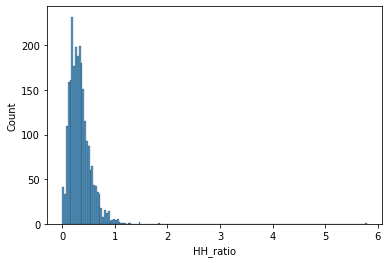

In [ ]:
# histogram for the Household ratio column
sns.histplot(census_map_svi_snap['HH_ratio'], bins='auto')

In [ ]:
# Identify outliers with more than 3 standard deviations from the mean
census_map_svi_snap.loc[ \
    (census_map_svi_snap['HH_ratio'] < (census_map_svi_snap['HH_ratio'].mean() - 3 * census_map_svi_snap['HH_ratio'].std())) \
    | (census_map_svi_snap['HH_ratio'] > (census_map_svi_snap['HH_ratio'].mean() + 3 * census_map_svi_snap['HH_ratio'].std())
    )
]

,countyFIPS,HHCount,PersonsPublic,PersonsNonPublic,PersonsTotal,HouseholdsPublicAssistance,HouseholdsNonPublicAssistance,HouseholdsTotal,Issuance,stateFIPS,...,% FI > High Threshold,Child Food Insecurity Rate (1 Year),# of Food Insecure Children (1 Year),% food insecure children in HH w/ HH incomes below 185 FPL,% food insecure children in HH w/ HH incomes above 185 FPL,Cost Per Meal (1 Year),Weighted weekly $ needed by FI,Weighted Annual Food Budget Shortfall,State,HH_ratio
52,1105,3140.0,1449.0,5019.0,6468.0,933.0,2569.0,3502.0,937071.0,2,...,0.000,0.449,870.0,0.81,0.19,3.28,17.418113,1104000.0,Alabama,1.115287
65,1131,3961.0,1806.0,6284.0,8090.0,1132.0,3003.0,4135.0,1176247.0,2,...,0.000,0.423,1060.0,0.83,0.18,3.12,16.563172,1140000.0,Alabama,1.043928
67,2110,12878.0,20382.0,146779.0,167161.0,11816.0,62804.0,74620.0,31929385.0,4,...,0.515,0.115,790.0,0.51,0.49,3.87,20.552751,1858000.0,Alaska,5.794378
516,17029,20972.0,1938.0,44919.0,46857.0,729.0,23157.0,23886.0,6851056.0,34,...,0.327,0.164,1510.0,0.72,0.28,2.92,15.481723,3405000.0,Illinois,1.138947
562,17153,2050.0,686.0,6131.0,6817.0,335.0,3451.0,3786.0,1027649.0,34,...,0.130,0.254,290.0,0.75,0.25,2.98,15.837158,394000.0,Illinois,1.846829
564,17159,6527.0,512.0,13521.0,14033.0,206.0,6862.0,7068.0,2020932.0,34,...,0.364,0.124,450.0,0.72,0.28,2.92,15.486800,855000.0,Illinois,1.082886
1015,22035,1688.0,531.0,4066.0,4597.0,500.0,1685.0,2185.0,675981.0,44,...,0.000,0.464,790.0,0.83,0.17,3.08,16.371994,894000.0,Louisiana,1.294431
1382,35015,21548.0,1749.0,48745.0,50494.0,1105.0,30233.0,31338.0,3132689.0,70,...,0.347,0.190,2900.0,0.64,0.37,3.24,17.181023,3617000.0,New Mexico,1.454335
1384,35019,1345.0,141.0,2527.0,2668.0,52.0,1369.0,1421.0,372400.0,70,...,0.231,0.218,170.0,0.74,0.26,3.16,16.793916,265000.0,New Mexico,1.056506
1390,35029,8911.0,1499.0,17648.0,19147.0,520.0,8555.0,9075.0,2770375.0,70,...,0.000,0.327,2070.0,0.96,0.04,3.02,16.014674,2361000.0,New Mexico,1.018404


In [ ]:
# Drop extreme outliers
indexdrop = \
     census_map_svi_snap.loc[(census_map_svi_snap['HH_ratio'] < (census_map_svi_snap['HH_ratio'].mean() - 3 * census_map_svi_snap['HH_ratio'].std())) \
                             | (census_map_svi_snap['HH_ratio'] > (census_map_svi_snap['HH_ratio'].mean() + 3 * census_map_svi_snap['HH_ratio'].std()))].index

census_map_svi_snap.drop(index=indexdrop, inplace = True)

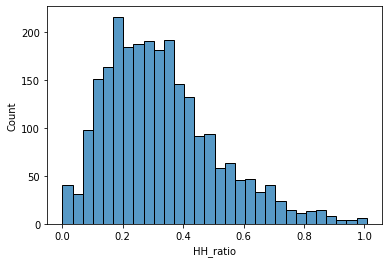

In [ ]:
# histogram after removing extreme outliers
sns.histplot(census_map_svi_snap['HH_ratio'], bins='auto')

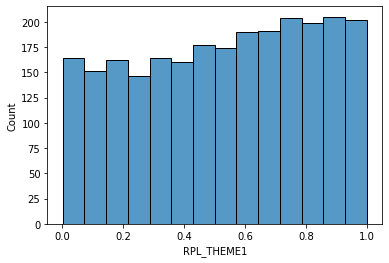

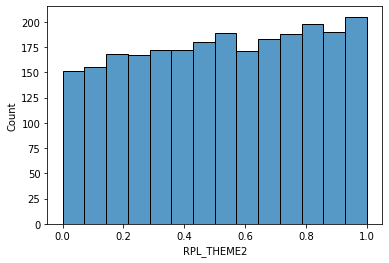

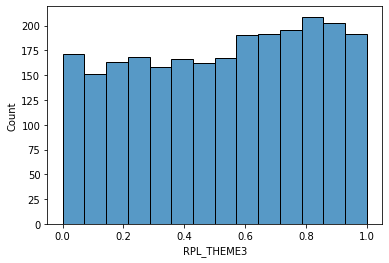

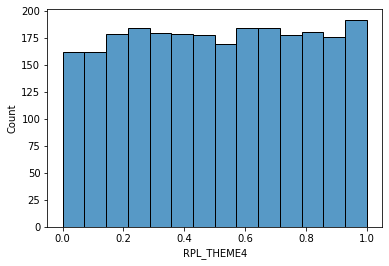

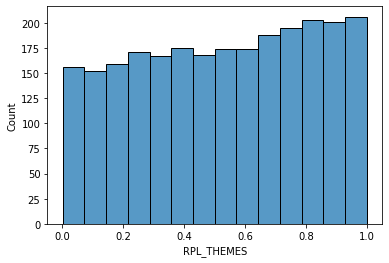

In [ ]:
# histogram of the RPL columns
for theme in ['RPL_THEME1','RPL_THEME2','RPL_THEME3','RPL_THEME4','RPL_THEMES']:
     sns.histplot(data = census_map_svi_snap[theme], bins='auto')
     plt.show()     

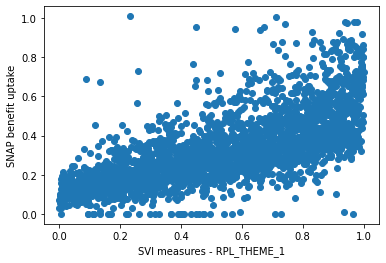

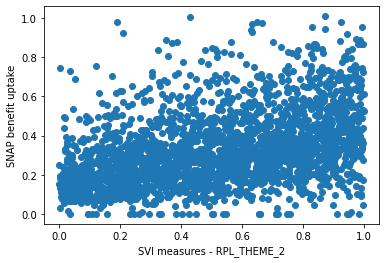

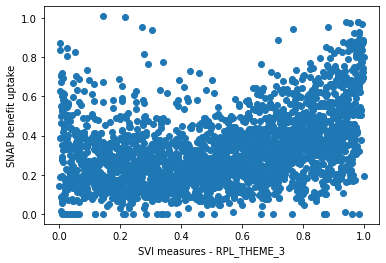

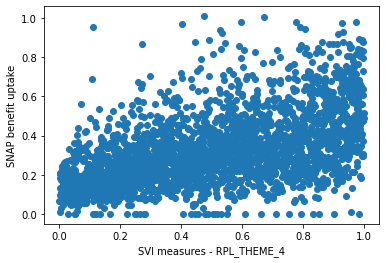

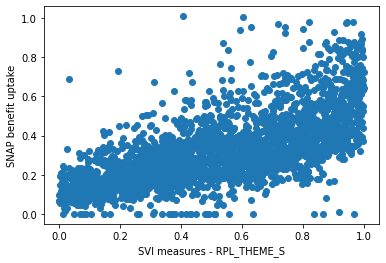

In [ ]:
# scatter plots
y = census_map_svi_snap['HH_ratio']

for theme in ['1','2','3','4','S']:
      x = census_map_svi_snap['RPL_THEME' + theme]
      plt.scatter(x, y)
      plt.xlabel('SVI measures - RPL_THEME_' + theme)
      plt.ylabel('SNAP benefit uptake')
      plt.show()

Spearman Correlation Coefficient (pandas corr) of Theme and HH_ratio columns

In [90]:
spearman_coeff_rt1 = census_map_svi_snap["RPL_THEME1"].corr(census_map_svi_snap['HH_ratio'], method="spearman") 
spearman_coeff_rt1

0.7540008091547197

In [91]:
spearman_coeff_rt2 = census_map_svi_snap["RPL_THEME2"].corr(census_map_svi_snap['HH_ratio'], method="spearman") 
spearman_coeff_rt2

0.4566392671272811

In [92]:
spearman_coeff_rt3 = census_map_svi_snap["RPL_THEME3"].corr(census_map_svi_snap['HH_ratio'], method="spearman") 
spearman_coeff_rt3

0.4152348287181813

In [93]:
spearman_coeff_rt4 = census_map_svi_snap["RPL_THEME4"].corr(census_map_svi_snap['HH_ratio'], method="spearman") 
spearman_coeff_rt4

0.5413386366559463

In [94]:
spearman_coeff_rts = census_map_svi_snap["RPL_THEMES"].corr(census_map_svi_snap['HH_ratio'], method="spearman") 
spearman_coeff_rts

0.7312442468191644

Pearson Correlation Coefficient (numpy corrcoef)




In [ ]:
np.corrcoef(x,y)

array([[1.        , 0.68526503],
       [0.68526503, 1.        ]])

### Check regression to see how they predict together - linear coefficients with their statistical significance.

In [95]:
# subset of the final dataframe
cmss_subset = census_map_svi_snap[['Issuance','HH_ratio','Overall Food Insecurity Rate (1 Year)','RPL_THEMES']]

In [107]:
# correlation of dataframe
corr_mat = cmss_subset.corr().sort_values(by=['HH_ratio', 'RPL_THEMES'])
corr_mat 

,Issuance,HH_ratio,Overall Food Insecurity Rate (1 Year),RPL_THEMES
Issuance,1.000000,0.101968,0.001833,0.161450
Overall Food Insecurity Rate (1 Year),0.001833,0.563706,1.000000,0.688764
RPL_THEMES,0.161450,0.572049,0.688764,1.000000
HH_ratio,0.101968,1.000000,0.563706,0.572049


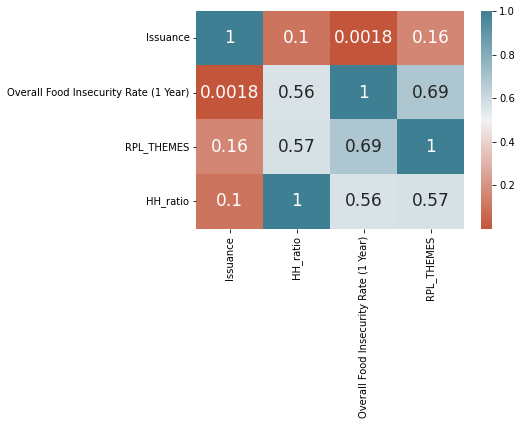

In [106]:
sns.heatmap(corr_mat, annot=True, annot_kws={'fontsize':17}, cmap=sns.diverging_palette(20,220,as_cmap=True))

## Analysis
---



1.   The SNAP combined dataset shape was orginally 2536 rows and 10 columns
     The SVI dataset shape was 3143 rows and 9 columns
     The map meal gap 2020 dataset was 3143 rows and 24 columns
     The census dataset shape was 2507 rows and 2 columns  

2.   There was some data loss as a result of the merge - SNAP data is missing a bit over 600 counties.

3.   From the histogram the household ratio 'HH_ratio' is positively skewed and normally distributed. The RPL Themes are bars almost the same because they are percentile ranks.

4.   The scatter plot charts show SNAP benefit uptake increases with vulnerability (positive/slightly positive) except THEME3 which is the ranking for Racial and Ethnic Minority Status theme doesn't seem to be correlated.

5.   Correlation Coefficients: theme1 and themes (overall) has a strong positive correlation and theme4 has a slightly positive correlation.

6.  Correlation matrix and heatmap slightly positive relationship with HH_Ratio, Overall Food Insecurity Rate (1 Year), RPL_THEMES (SVI Overall). 











